In [1]:
import shutil
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image as ImageDisplay
from sklearn.model_selection import train_test_split

In [8]:
'''
https://www.kaggle.com/jessicali9530/celeba-dataset
Adresinden
    - img_align_celebA klasörü
    - list_attr_celeba.csv dosyası indirilir ve projedeki dataset klasörüne atılır.
'''

image_dir = os.path.abspath('dataset/celeba/images')
attributes_file = os.path.abspath('dataset/celeba/list_attr_celeba.csv')
output_dir = os.path.abspath('dataset/preprocessed_dataset_celeba')

In [9]:
# Özellik vektörünün olduğu csv dosyası pandas ile okunur
data = pd.read_csv(attributes_file) 
print(data.head())

     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

In [10]:
# Siyah ve Sarı saç özelliği "1" olan Kadın ünlülerden 1000' er adet örnek seçilerek ilgili dataframe'lere atanır
df_blackHair = data.loc[data['Black_Hair' ] == 1 & (data['Male'] == -1)].sample(n=1000)
df_blond = data.loc[data['Blond_Hair'] == 1 & (data['Male'] == -1)].sample(n=1000)

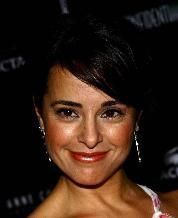

In [11]:
# Siyah saçlı ilk imgeyi inceleyelim
ImageDisplay(os.path.join(image_dir, df_blackHair.iloc[0]['image_id']))

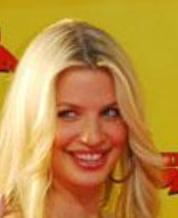

In [12]:
# Sarı saçlı ilk imgeyi inceleyelim
ImageDisplay(os.path.join(image_dir, df_blond.iloc[0]['image_id']))

In [13]:
# Seçilen imgelerin isimlerine kopyalama esnasında
# daha kolay ulaşmak için birer listeye kaydedelim

domainA, domainB = [], []

for index, row in df_blackHair.iterrows():
    domainA.append(row['image_id'])

for index, row in df_blond.iterrows():
    domainB.append(row['image_id'])
    

In [14]:
#Train ve test verisini ilk seçtiğimiz 1000 imgeden bölerek oluşuruyoruz
A_train, A_test = train_test_split(domainA, test_size=0.01, random_state=42)
B_train, B_test = train_test_split(domainB, test_size=0.01, random_state=42)

Train ve Test verilerinin oluşturulması

In [15]:
#train klasörlerinin yolları belirlenir ve kayıt klasörlerini oluşturuyoruz.
A_train_dir = os.path.join(output_dir, 'train/A')
B_train_dir = os.path.join(output_dir, 'train/B')

os.makedirs(A_train_dir, exist_ok=True)
os.makedirs(B_train_dir, exist_ok=True)

#orijinal lokasyondan yeni lokasyona kopyalıyoruz
for imageA, imageB in zip(A_train, B_train):
    shutil.copy(os.path.join(image_dir, imageA), os.path.join(A_train_dir, imageA))
    shutil.copy(os.path.join(image_dir, imageB), os.path.join(B_train_dir, imageB))
    
#train klasörlerinin yolları belirlenir ve kayıt klasörlerini oluşturuyoruz.
A_test_dir = os.path.join(output_dir, 'test/A')
B_test_dir = os.path.join(output_dir, 'test/B')

os.makedirs(A_test_dir, exist_ok=True)
os.makedirs(B_test_dir, exist_ok=True)

#orijinal lokasyondan yeni lokasyona kopyalıyoruz
for imageA, imageB in zip(A_test, B_test):
    shutil.copy(os.path.join(image_dir, imageA), os.path.join(A_test_dir, imageA))
    shutil.copy(os.path.join(image_dir, imageB), os.path.join(B_test_dir, imageB))